In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [3]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.436374,1.366317,-0.546705,1.559187,1.793696,1
1,1.553173,0.605750,-0.944823,4.617139,1.234081,1
2,-0.942369,0.070494,-0.785838,1.724045,2.177779,1
3,-1.067364,-1.142528,-1.728513,-1.352818,1.769386,0
4,3.173257,-2.093358,0.727405,-1.058456,-2.305050,0


In [7]:
# function for row sampling

def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
# function for feature sampling

def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [8]:
# function for combined sampling

def combined_features(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

In [13]:
df1 = sample_rows(df,0.5)
df1.head()

,col1,col2,col3,col4,col5,target
91,1.022077,1.251280,0.266395,2.612674,1.815571,1
16,-0.175107,0.831784,0.356615,1.693286,1.101237,1
38,0.180641,1.147733,2.771268,0.790622,-1.760025,0
65,-1.880811,-0.360235,-1.385161,-1.745892,1.025280,0
70,0.116999,-0.413355,-0.634674,-3.849063,1.795706,0


In [14]:
df2 = sample_rows(df,0.5)
df2.head()

,col1,col2,col3,col4,col5,target
6,3.825923,4.482937,0.155856,-0.963436,4.415330,1
44,0.913034,-1.979090,-0.749150,-0.068931,0.016565,0
2,-0.942369,0.070494,-0.785838,1.724045,2.177779,1
67,4.570948,0.738646,-1.122006,1.536872,1.063329,1
94,-0.349395,0.346274,-2.572600,0.178106,-1.379774,1


In [15]:
df3 = sample_rows(df,0.5)
df3.head()

,col1,col2,col3,col4,col5,target
23,-0.626185,-0.796657,1.584600,-3.872234,-1.169498,0
56,-1.552166,0.659055,-3.022222,-1.393356,-1.561384,1
12,2.339789,-1.684711,3.801510,0.049624,-3.846763,0
20,0.932734,0.647560,-0.829693,1.312049,1.673851,1
69,0.087650,1.641346,-0.414839,3.453674,1.036976,1


In [16]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col2', 'col3', 'col4', 'col5', 'target'], dtype='object')


In [18]:
df3.sample(5)

,col1,col2,col3,col4,col5,target
17,1.876614,2.380160,1.214679,3.012381,3.191172,1
9,0.515929,-1.087411,-1.272536,-1.392118,0.506756,0
27,1.303057,-0.269820,1.706127,-3.376521,-0.471113,0
70,0.116999,-0.413355,-0.634674,-3.849063,1.795706,0
53,3.034338,1.347605,-2.353972,2.016318,-0.775838,1


In [19]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [27]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [28]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[1] <= -0.142\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.25, 0.7, 'x[2] <= -2.034\ngini = 0.191\nsamples = 28\nvalue = [25, 3]'),
 Text(0.125, 0.5, 'x[4] <= 0.854\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'x[3] <= 1.082\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.4375, 0.3, 'x[4] <= -0.984\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.7, 'x[4] <= -0.159\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.625, 0.5, 'x[3] <= 0.484\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.5625, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6875, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),


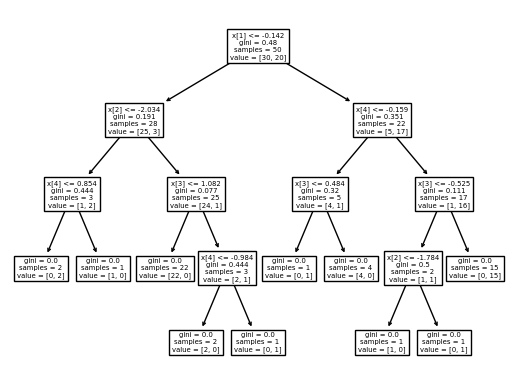

In [29]:
plot_tree(clf1)

[Text(0.375, 0.9, 'x[1] <= -0.231\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.5, 0.7, 'x[4] <= 0.023\ngini = 0.225\nsamples = 31\nvalue = [4, 27]'),
 Text(0.25, 0.5, 'x[4] <= -1.007\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.5, 'x[0] <= -0.966\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.625, 0.3, 'x[2] <= -0.978\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

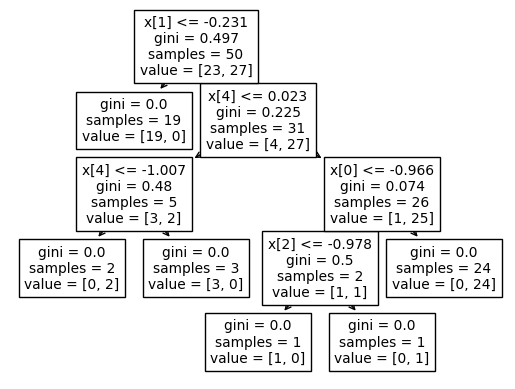

In [30]:
plot_tree(clf2)

[Text(0.5, 0.875, 'x[1] <= 0.051\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.25, 0.625, 'x[2] <= -2.142\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.75, 0.625, 'x[4] <= 0.755\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.625, 0.375, 'x[2] <= -2.32\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

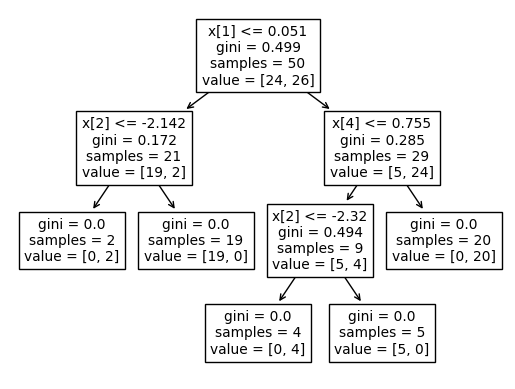

In [31]:
plot_tree(clf3)

In [32]:
clf1.predict(np.array([1.303057, -0.269820, 1.706127, -3.376521,-0.471113]).reshape(1,5))

C:\Users\n\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:
clf2.predict(np.array([1.303057, -0.269820, 1.706127, -3.376521,-0.471113]).reshape(1,5))

C:\Users\n\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [34]:
clf3.predict(np.array([1.303057, -0.269820, 1.706127, -3.376521,-0.471113]).reshape(1,5))

C:\Users\n\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [35]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
49,0.974725,1.603269,-0.542548,-0.469007,1.293157,1
81,3.300618,2.300964,-1.225670,1.416368,2.152983,1
38,0.180641,1.147733,2.771268,0.790622,-1.760025,0
42,-0.191768,0.146573,0.355344,3.512200,-0.633562,0
19,2.091337,-0.149391,-1.803858,0.556779,0.049610,1
26,-0.191033,-0.949722,-1.103293,-3.507018,0.684180,0
59,0.742199,0.154496,-0.741047,3.223822,0.924669,1
86,-0.251842,3.711889,-1.324813,0.825785,3.180548,1
60,3.111088,-0.929906,5.648860,0.684477,-4.975098,0
64,2.756622,-2.939594,-2.042719,-1.748649,0.952953,0
